<a href="https://colab.research.google.com/github/honghaerim/AI-programming/blob/main/12%EC%9B%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 34ms/step - accuracy: 0.7719 - loss: 0.6275 - val_accuracy: 0.8430 - val_loss: 0.4168
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.8843 - loss: 0.3176 - val_accuracy: 0.8832 - val_loss: 0.3141
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9065 - loss: 0.2571 - val_accuracy: 0.9051 - val_loss: 0.2638
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9179 - loss: 0.2212 - val_accuracy: 0.9081 - val_loss: 0.2493
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9251 - loss: 0.1959 - val_accuracy: 0.9060 - val_loss: 0.2673
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9057 - loss: 0.2708
Test Loss: 0.26734989881515503
Test Accuracy: 0.906000018119812
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 277s 147ms/step - accuracy: 0.8251 - loss: 0.4862 - val_accuracy: 0.9004 - val_loss: 0.2793
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 272s 145ms/step - accuracy: 0.9

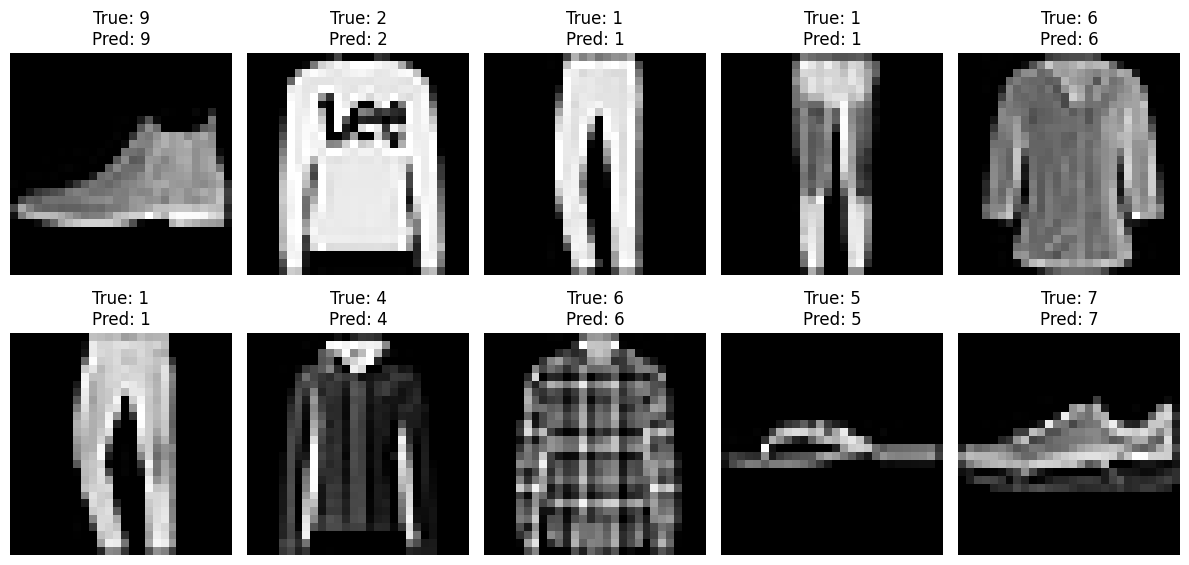

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape data to add channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Build the CNN model with strides=2 in MaxPooling2D
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Modify strides in MaxPooling2D and re-train
model_with_stride_1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2), strides=1),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), strides=1),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_with_stride_1.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the modified model
history_stride_1 = model_with_stride_1.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the modified model
loss_stride_1, accuracy_stride_1 = model_with_stride_1.evaluate(test_images, test_labels)
print(f"Test Loss with strides=1: {loss_stride_1}")
print(f"Test Accuracy with strides=1: {accuracy_stride_1}")

# Predict using the modified model
predictions = model_with_stride_1.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display a classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# Plot a few test images with their predictions
num_images = 10
plt.figure(figsize=(12, 6))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.7759 - loss: 0.6176 - val_accuracy: 0.8723 - val_loss: 0.3474
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 33ms/step - accuracy: 0.8824 - loss: 0.3162 - val_accuracy: 0.8795 - val_loss: 0.3227
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9062 - loss: 0.2559 - val_accuracy: 0.8998 - val_loss: 0.2721
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9205 - loss: 0.2151 - val_accuracy: 0.9081 - val_loss: 0.2527
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9280 - loss: 0.1918 - val_accuracy: 0.9067 - val_loss: 0.2657
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9091 - loss: 0.2710
Loss: 0.26569703221321106, Accuracy: 0.9067000150680542
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 300s 159ms/step - accuracy: 0.8182 - loss: 0.5170 - val_accuracy: 0.8921 - val_loss: 0.2926
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 306s 151ms/step - accuracy: 0.9111 - los

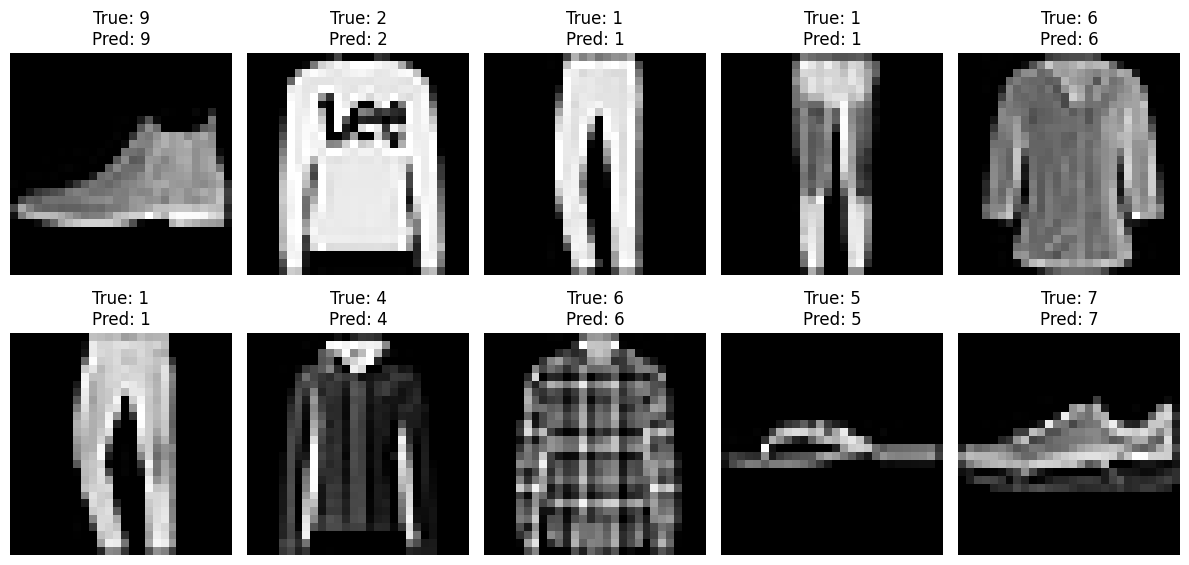

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images, test_images = train_images[..., np.newaxis], test_images[..., np.newaxis]

# Build CNN model with strides=2
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
loss, acc = model.evaluate(test_images, test_labels)
print(f"Loss: {loss}, Accuracy: {acc}")

# Modify strides in MaxPooling2D and re-train
model_stride_1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2), strides=1),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), strides=1),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model_stride_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_stride_1.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
loss_s1, acc_s1 = model_stride_1.evaluate(test_images, test_labels)
print(f"Loss (strides=1): {loss_s1}, Accuracy: {acc_s1}")

# Predict and visualize results
predictions = np.argmax(model_stride_1.predict(test_images), axis=1)
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title(f"True: {test_labels[i]}\nPred: {predictions[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
import numpy as np

# Probabilities for the 5 arms of the multi-armed bandit
arm_probabilities = [0.1, 0.5, 0.3, 0.7, 0.9]
num_arms = len(arm_probabilities)

# Number of times each arm is pulled
counts = np.zeros(num_arms)

# Estimated rewards for each arm
values = np.zeros(num_arms)

# Epsilon-greedy algorithm
def epsilon_greedy(eps, num_trials):
    global counts, values
    for _ in range(num_trials):
        if np.random.rand() < eps:  # Explore
            chosen_arm = np.random.randint(0, num_arms)
        else:  # Exploit
            chosen_arm = np.argmax(values)

        # Simulate pulling the arm
        reward = 1 if np.random.rand() < arm_probabilities[chosen_arm] else 0

        # Update counts and values
        counts[chosen_arm] += 1
        n = counts[chosen_arm]
        values[chosen_arm] += (reward - values[chosen_arm]) / n

    return counts, values

# Run the epsilon-greedy algorithm with epsilon=0.2 and 1000 trials
epsilon = 0.2
num_trials = 1000
final_counts, final_values = epsilon_greedy(epsilon, num_trials)

# Display results
print(f"Number of pulls per arm: {final_counts}")
print(f"Estimated values per arm: {final_values}")
print(f"Best arm based on estimates: Arm {np.argmax(final_values) + 1}")

Number of pulls per arm: [ 34.  78.  47.  33. 808.]
Estimated values per arm: [0.05882353 0.43589744 0.29787234 0.81818182 0.92326733]
Best arm based on estimates: Arm 5


In [5]:
import numpy as np
import gym

def frozenlake_value_iteration(env, gamma=0.99, theta=1e-8):
    num_states, num_actions = env.observation_space.n, env.action_space.n
    value_function = np.zeros(num_states)

    while True:
        delta = 0
        for state in range(num_states):
            values = [
                sum(prob * (reward + gamma * value_function[next_state])
                    for prob, next_state, reward, _ in env.P[state][action])
                for action in range(num_actions)
            ]
            new_value = max(values)
            delta = max(delta, abs(new_value - value_function[state]))
            value_function[state] = new_value
        if delta < theta:
            break

    policy = np.array([
        np.argmax([
            sum(prob * (reward + gamma * value_function[next_state])
                for prob, next_state, reward, _ in env.P[state][action])
            for action in range(num_actions)
        ]) for state in range(num_states)
    ])

    return policy, value_function

if __name__ == "__main__":
    env = gym.make("FrozenLake-v1", is_slippery=False)
    policy, value_function = frozenlake_value_iteration(env)

    print("Optimal Value Function:", value_function)
    print("Optimal Policy:", policy)

    state, total_reward = env.reset(), 0
    while True:
        env.render()
        action = policy[state]
        state, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            print(f"Total Reward: {total_reward}")
            break



/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Optimal Value Function: [0.95099005 0.96059601 0.970299   0.96059601 0.96059601 0.
 0.9801     0.         0.970299   0.9801     0.99       0.
 0.         0.99       1.         0.        ]
Optimal Policy: [1 2 1 0 1 0 1 0 2 1 1 0 0 2 2 0]
Total Reward: 1.0
